Pré-processamento

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Colunas disponíveis: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Tipos de dados:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Valores únicos por variável (para análise categórica):
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
FastingBS: [0 1]
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']
HeartDisease: [0 1]

Valores ausentes por coluna:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope     

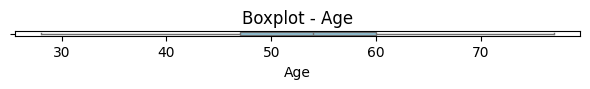

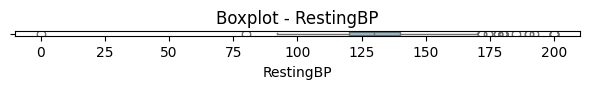

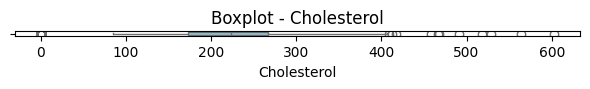

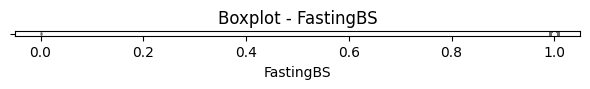

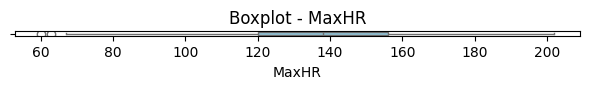

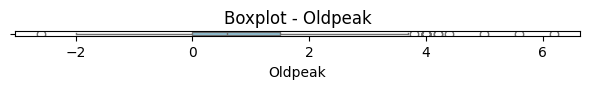

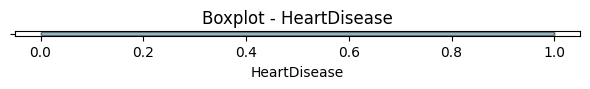


Transformação final realizada. Dimensões dos dados processados:
X (atributos): (715, 16)
y (alvo): (715,)


In [7]:
# Bibliotecas essenciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Carregando os dados com segurança
try:
    df = pd.read_csv("heart.csv")
    df.columns = df.columns.str.strip()  # Remove espaços extras em nomes de colunas
except Exception as e:
    print("Erro ao carregar o arquivo CSV:", e)

# Exibição inicial
display(df.head())
display(df.info())
display(df.describe())

# Ajuste correto do nome da variável alvo
print("\nColunas disponíveis:", df.columns.tolist())
target = 'HeartDisease'
features = df.drop(columns=[target]).columns.tolist()

# Verificação de tipos e variáveis com poucos valores únicos
print("\nTipos de dados:")
print(df.dtypes)

print("\nValores únicos por variável (para análise categórica):")
for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() < 10:
        print(f"{col}: {df[col].unique()}")

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Visualização de outliers via boxplot
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.tight_layout()
    plt.show()

# Função auxiliar para remover outliers com base no IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Remoção de outliers de colunas específicas
# Ajustando nomes conforme dataset
df = remove_outliers_iqr(df, 'Cholesterol')
df = remove_outliers_iqr(df, 'RestingBP')

# Binarizar idade acima de 50 anos
df['age_over_50'] = df['Age'].apply(lambda x: 1 if x > 50 else 0)

# Separação entre variáveis numéricas e categóricas
cat_cols = [col for col in df.columns if df[col].nunique() < 10 and col != target]
num_cols = [col for col in df.columns if col not in cat_cols + [target]]

# Pipeline de transformação com padronização e one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Aplicando a transformação nos dados
X = preprocessor.fit_transform(df.drop(columns=target))
y = df[target].values

print("\nTransformação final realizada. Dimensões dos dados processados:")
print("X (atributos):", X.shape)
print("y (alvo):", y.shape)


Mineração e Avaliação


Treinando modelo: RandomForest
Melhores parâmetros: {'max_depth': None, 'n_estimators': 100}
Acurácia média na validação cruzada estratificada: 0.8643

Treinando modelo: SVM
Melhores parâmetros: {'C': 1, 'kernel': 'rbf'}
Acurácia média na validação cruzada estratificada: 0.8671

Treinando modelo: KNN
Melhores parâmetros: {'n_neighbors': 5, 'weights': 'distance'}
Acurácia média na validação cruzada estratificada: 0.8490

=== Avaliação final (todo o dataset): RandomForest ===
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       338

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



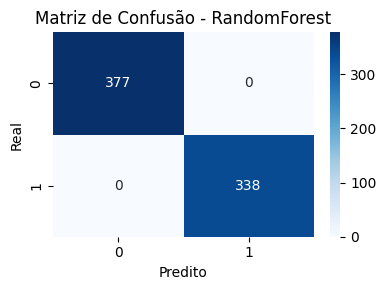


=== Avaliação final (todo o dataset): SVM ===
Acurácia: 0.9034965034965035
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       377
           1       0.89      0.91      0.90       338

    accuracy                           0.90       715
   macro avg       0.90      0.90      0.90       715
weighted avg       0.90      0.90      0.90       715



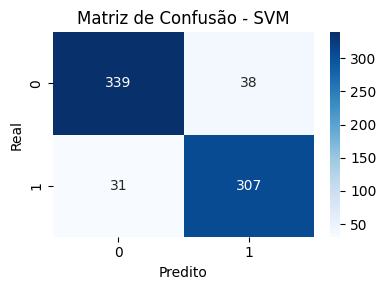


=== Avaliação final (todo o dataset): KNN ===
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       338

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



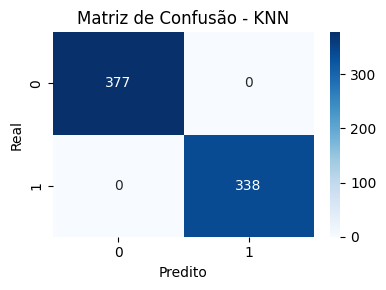

In [8]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o validador estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelos e hiperparâmetros
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 150],
            'max_depth': [None, 10]
        }
    },
    'SVM': {
        'model': SVC(probability=True),
        'params': {
            'C': [1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5],
            'weights': ['uniform', 'distance']
        }
    }
}

best_models = {}
for name, m in models.items():
    print(f"\nTreinando modelo: {name}")
    clf = GridSearchCV(
        estimator=m['model'],
        param_grid=m['params'],
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )
    clf.fit(X, y)
    best_models[name] = clf
    print(f"Melhores parâmetros: {clf.best_params_}")
    print(f"Acurácia média na validação cruzada estratificada: {clf.best_score_:.4f}")

# Avaliação no conjunto completo (simulando aplicação real)
for name, clf in best_models.items():
    y_pred = clf.predict(X)
    print(f"\n=== Avaliação final (todo o dataset): {name} ===")
    print("Acurácia:", accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {name}")
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()


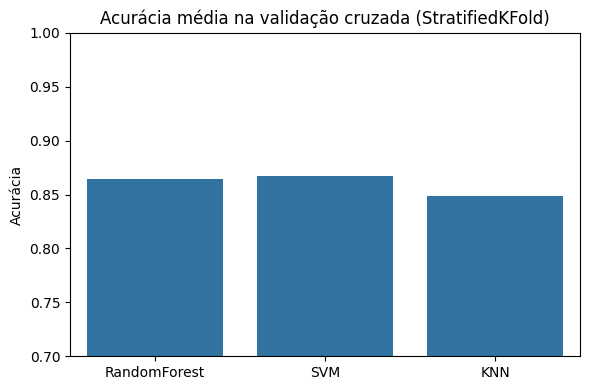

In [10]:
# Comparação das acurácias na validação cruzada
model_scores = {name: clf.best_score_ for name, clf in best_models.items()}

# Gráfico de comparação
plt.figure(figsize=(6, 4))
sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
plt.title("Acurácia média na validação cruzada (StratifiedKFold)")
plt.ylabel("Acurácia")
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()


Avaliação qualitativa dos erros


Melhor modelo para análise qualitativa: SVM

Total de erros: 69 de 715 amostras

Distribuição dos erros por Sexo:
Sex
M    0.782609
F    0.217391
Name: proportion, dtype: float64

Distribuição dos erros por faixa de idade:
faixa_idade
[55, 70)    39
[40, 55)    28
[25, 40)     1
[70, 80)     1
Name: count, dtype: int64

Distribuição dos erros por tipo de dor no peito (ChestPainType):
ChestPainType
ASY    41
NAP    14
TA      8
ATA     6
Name: count, dtype: int64


C:\Users\Marcus\AppData\Local\Temp\ipykernel_18128\2485144162.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_erros['faixa_idade'] = pd.cut(df_erros['Age'], bins=[25, 40, 55, 70, 80], right=False)


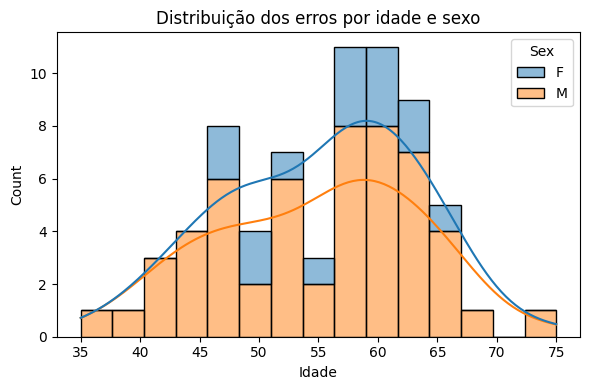

In [9]:
# Identificar o melhor modelo com base na acurácia
melhor_nome = max(best_models, key=lambda k: best_models[k].best_score_)
melhor_modelo = best_models[melhor_nome]
print(f"\nMelhor modelo para análise qualitativa: {melhor_nome}")

# Prever com o melhor modelo
y_pred = melhor_modelo.predict(X)

# Identificar instâncias incorretas
erros = df.copy()
erros['predito'] = y_pred
erros['erro'] = erros['HeartDisease'] != erros['predito']
df_erros = erros[erros['erro'] == True]

print(f"\nTotal de erros: {df_erros.shape[0]} de {df.shape[0]} amostras")

# Análise por sexo
print("\nDistribuição dos erros por Sexo:")
print(df_erros['Sex'].value_counts(normalize=True))

# Análise por faixa etária
df_erros['faixa_idade'] = pd.cut(df_erros['Age'], bins=[25, 40, 55, 70, 80], right=False)
print("\nDistribuição dos erros por faixa de idade:")
print(df_erros['faixa_idade'].value_counts())

# Análise por tipo de dor no peito
print("\nDistribuição dos erros por tipo de dor no peito (ChestPainType):")
print(df_erros['ChestPainType'].value_counts())

# Visualização de erros por idade e sexo
plt.figure(figsize=(6, 4))
sns.histplot(data=df_erros, x="Age", hue="Sex", bins=15, kde=True, multiple="stack")
plt.title("Distribuição dos erros por idade e sexo")
plt.xlabel("Idade")
plt.tight_layout()
plt.show()
